In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_excel(r'C:\Users\11ana\Desktop\Projects\Input Well F1C.xlsx', sheet_name = 'Train')
test = pd.read_excel(r'C:\Users\11ana\Desktop\Projects\Input Well F1C.xlsx', sheet_name = 'Test')

<AxesSubplot:>

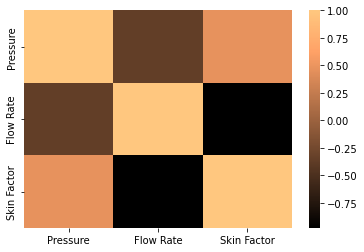

In [3]:
sns.heatmap(train.corr(method='spearman'),cmap="copper")

<AxesSubplot:>

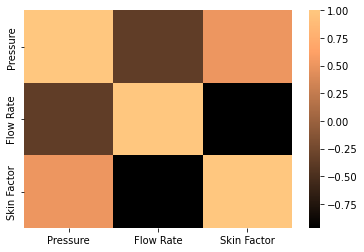

In [4]:
sns.heatmap(test.corr(method='spearman'),cmap="copper")

In [5]:
train= train.dropna(axis =1)
test= test.dropna(axis =1)

In [6]:
X1 = train[['Pressure','Flow Rate']].values
X2 = test[['Pressure','Flow Rate']].values

In [7]:
y1 = train['Skin Factor'].values
y2 = test['Skin Factor'].values

In [8]:
x1=X2
x2= X1
Y1= y2
Y2=y1

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X1 = scaler.fit_transform(X1)

In [12]:
X2 = scaler.transform(X2)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
from xgboost import XGBRegressor

C:\Users\11ana\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [15]:
model_rf = XGBRegressor()
model_rf.fit(X1,y1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [16]:
model_rf.score(X1,y1)

0.9999919444137968

In [17]:
model_rf.score(X2,y2)

0.7443650946536815

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
Grid_para = {
    "n_estimators" : [90,100,120,150],
    "min_samples_split" : range(2,10,1),
    "min_samples_leaf" : range(2,10,1),
    "max_depth" : range(2,30,1)
    
}

In [20]:
grid = GridSearchCV(estimator = model_rf , param_grid = Grid_para ,n_jobs = -1 , verbose = 3)

In [21]:
grid.fit(X1,y1)

Fitting 5 folds for each of 7168 candidates, totalling 35840 fits
[00:29:44] WARNING: ..\src\learner.cc:576: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=12,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,

In [22]:
grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 120}

In [23]:
model_rf = XGBRegressor( n_estimators = 120 , min_samples_split = 2, min_samples_leaf = 2 , max_depth = 3)

In [24]:
model_rf.fit(X1, y1)

[00:32:20] WARNING: ..\src\learner.cc:576: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1,
             min_samples_leaf=2, min_samples_split=2, missing=nan,
             monotone_constraints='()', n_estimators=120, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
y_boost = model_rf.predict(X2)

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y2, y_boost))
print('MSE:', metrics.mean_squared_error(y2, y_boost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2, y_boost)))
print('R2:', metrics.r2_score(y2, y_boost))

MAE: 0.29731493224225597
MSE: 0.3645257286363971
RMSE: 0.603759661319301
R2: 0.8373661368672087


In [27]:
y2 = y2.reshape(56,1)

In [28]:
y_boost.reshape(56,1)

array([[-4.4721503],
       [-4.305317 ],
       [-4.1181235],
       [-3.9414418],
       [-3.8069274],
       [-3.6150048],
       [-3.6692817],
       [-3.3724039],
       [-3.3724039],
       [ 1.4908465],
       [-3.445316 ],
       [-2.7761958],
       [-2.7624576],
       [-2.8657043],
       [-2.7123754],
       [-2.7624576],
       [-2.7624576],
       [-2.6953454],
       [-2.9521563],
       [-3.2985847],
       [-2.6912947],
       [-2.655344 ],
       [-2.655344 ],
       [-2.655344 ],
       [-2.655344 ],
       [-2.655344 ],
       [-2.655344 ],
       [-2.6052618],
       [-2.239553 ],
       [-2.1605937],
       [-2.1605937],
       [-2.6052618],
       [-2.6052618],
       [-1.4655108],
       [-2.6052618],
       [-2.223304 ],
       [-2.2436037],
       [-2.2436037],
       [-2.2436037],
       [-2.2436037],
       [ 1.433308 ],
       [-2.219304 ],
       [-2.655344 ],
       [-2.7847874],
       [-2.7787251],
       [-2.6856987],
       [-2.6864893],
       [-2.65

In [29]:
X_Time = pd.DataFrame(X2, columns = ['Pressure', 'Flow Rate'])

In [30]:
y_boost = pd.Series(y_boost.reshape(56,))

In [31]:
pred_df = pd.DataFrame(y2, columns = ['Skin Factor'])

In [32]:
pred_df = pd.concat([pred_df,y_boost], axis =1)

In [33]:
pred_df.columns = ['Skin Factor', 'Model Predictions']

In [34]:
pred_dfs = pd.concat([X_Time, pred_df], axis =1)

In [35]:
x1 = pd.DataFrame(x1, columns = ['Pressure','Flow Rate'])

In [36]:
pred_dfs = pd.concat([x1, pred_df], axis =1)

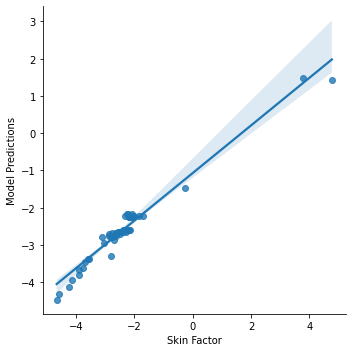

In [37]:
sns.lmplot(x='Skin Factor',y='Model Predictions',data=pred_dfs)

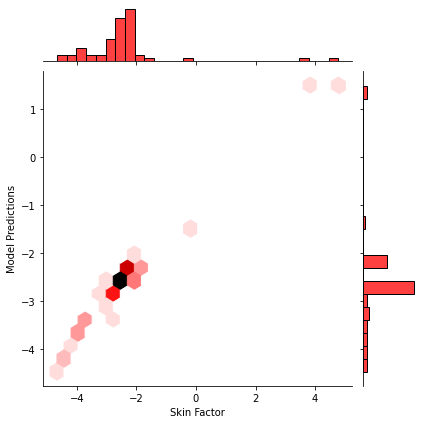

In [38]:
sns.jointplot(x='Skin Factor',y='Model Predictions',kind='hex',color= 'r', gridsize = 20, data=pred_dfs)